# Week 3 Homework - Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df_new = df[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Size','highway MPG','city mpg','MSRP']]
df_new.columns = df_new.columns.str.replace(' ', '_').str.lower()
df_new.fillna(0, inplace=True)
# df_new.rename({'MSRP':'price'}, axis='columns',inplace=True)
df_new['price'] = df_new['msrp'].copy()
df_new.drop(columns=['msrp'], inplace=True)
df_new.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Compact,28,18,34500


# Question 1  

What is the most frequent observation (mode) for the column `transmission_type`?

In [6]:
df_new.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

We observe that AUTOMATIC is the frequent observation for the column `transmission_type`.

# Question 2  

What are the two features that have the biggest correlation in this dataset?

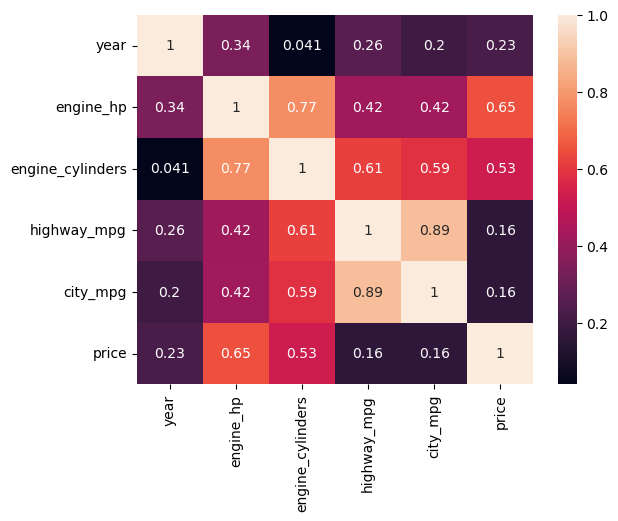

In [7]:
numerical_cols = list(df_new.dtypes[(df_new.dtypes == 'float64') | (df_new.dtypes == 'int64')].index)
categorical_cols = list(df_new.dtypes[(df_new.dtypes == 'object')].index)
sns.heatmap(df_new[numerical_cols].corr().abs(), annot=True)
plt.show()
# numerical_cols

`engine_hp` and `engine_cylinders` show highest correlation.

In [8]:
price_mean = df_new['price'].mean()
df_new['above_average'] = df_new.price.apply(lambda x: int(x > price_mean))
df_new.drop(columns=['price'],inplace=True)
df_new['above_average'].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [10]:
X_train = df_train.loc[:,df_new.columns[:-1]]
y_train = df_train.iloc[:,-1]
X_val = df_val.loc[:,df_new.columns[:-1]]
y_val = df_val.iloc[:,-1]
X_test = df_test.loc[:,df_new.columns[:-1]]
y_test = df_test.iloc[:,-1]
print('Original shape of new dataframe:', df_new.shape)
print('Shape of Training data:',X_train.shape,'and Training target value:',y_train.shape)
print('Shape of Validation data:',X_val.shape,'and Validation target value:',y_val.shape)
print('Shape of Testing data:',X_test.shape,'and Testing target value:',y_test.shape)

Original shape of new dataframe: (11914, 10)
Shape of Training data: (7148, 9) and Training target value: (7148,)
Shape of Validation data: (2383, 9) and Validation target value: (2383,)
Shape of Testing data: (2383, 9) and Testing target value: (2383,)


# Question 3  

Which of these variables has the lowest mutual information score?

In [11]:
from sklearn.metrics import mutual_info_score

for col in X_train[categorical_cols]:
    mis = mutual_info_score(X_train[col],y_train)
    print(f'MIS of {col} and above_average is {round(mis,2)}')

MIS of make and above_average is 0.24
MIS of model and above_average is 0.46
MIS of transmission_type and above_average is 0.02
MIS of vehicle_size and above_average is 0.04


We observe that `transmission_type` has the lowest mutual information score with `above_average`.

In [12]:
X_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_size,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,Midsize,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,Midsize,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Compact,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Compact,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,Compact,26,20


In [13]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(X_train.to_dict(orient='records'))
X_val = dv.transform(X_val.to_dict(orient='records'))

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred = (y_pred >= 0.5)


In [15]:
from sklearn.metrics import accuracy_score

original_score = accuracy_score(y_val, y_pred)
round(original_score,2)

0.94

We observe that the closest accuracy is `0.95`

In [16]:
# sorted(tuple(zip(dv.get_feature_names_out(), model.coef_[0].round(3))), key = lambda x: x[1])

# Question 5  

Which of following feature has the smallest difference?  
- year
- engine_hp
- transmission_type
- city_mpg

In [17]:
X_train = df_train.loc[:,df_new.columns[:-1]]
y_train = df_train.iloc[:,-1]
X_val = df_val.loc[:,df_new.columns[:-1]]
y_val = df_val.iloc[:,-1]
X_test = df_test.loc[:,df_new.columns[:-1]]
y_test = df_test.iloc[:,-1]
# print('Original shape of new dataframe:', df_new.shape)
# print('Shape of Training data:',X_train.shape,'and Training target value:',y_train.shape)
# print('Shape of Validation data:',X_val.shape,'and Validation target value:',y_val.shape)
# print('Shape of Testing data:',X_test.shape,'and Testing target value:',y_test.shape)

cols = X_train.columns.to_list()
cols

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_size',
 'highway_mpg',
 'city_mpg']

In [18]:
feature_score = dict()

for i in range(len(cols)):
    
    X_train_small = X_train[cols[:i]+cols[i+1:]]
    X_val_small = X_val[cols[:i]+cols[i+1:]]
    
    dv = DictVectorizer(sparse=False)
    
    X_train_small = dv.fit_transform(X_train_small.to_dict(orient='records'))
    X_val_small = dv.transform(X_val_small.to_dict(orient='records'))
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train_small, y_train)
    y_pred = model.predict_proba(X_val_small)[:, 1]
    y_pred = (y_pred >= 0.5)
    
    score = accuracy_score(y_val, y_pred)
    feature_score[cols[i]]= (original_score - score)*100 # for better representation

for feature in ('year', 'transmission_type', 'engine_hp', 'city_mpg'):
    print(f'{feature:>5} : {feature_score[feature]:.2f}')

 year : -0.42
transmission_type : -0.21
engine_hp : 1.59
city_mpg : 0.84


We observe that excluding `transmission_type` lead to least change in the accuracy, making the feature the least useful.

# Question 6  

Which of these alphas leads to the best RMSE on the validation set?

<AxesSubplot:>

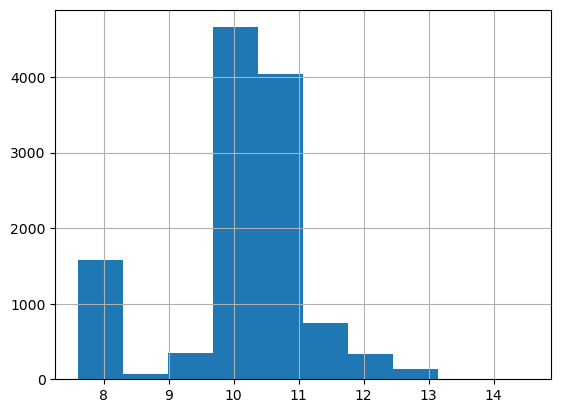

In [19]:
from sklearn.linear_model import Ridge

target = np.log1p(df['MSRP'])
target.hist()

In [20]:
df_new.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_size', 'highway_mpg', 'city_mpg',
       'above_average'],
      dtype='object')

In [21]:
df_numerical = df_new[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]

df_full_train, df_test, y_full_train, y_test = train_test_split(df_numerical, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7148, 5), (2383, 5), (7148,), (2383,))

In [21]:
from sklearn.metrics import mean_squared_error

alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas:
  model_ridge = Ridge(alpha=alpha, solver='sag', random_state=42)
  ridge = model_ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred)**(0.5)
  print(f'alpha:{alpha}, rmse: {rmse:.3f}')

alpha:0, rmse: 0.527
alpha:0.01, rmse: 0.527
alpha:0.1, rmse: 0.527
alpha:1, rmse: 0.527
alpha:10, rmse: 0.527


We observe that `alpha=0` gives the least RMSE.